# Linear regression with one variable (univariate linear regression)

## Loading the dataset

Load sample data (number of reservations and number of pizzas sold) from pizza.txt.

|Reservations (x)|Pizzas (y)|
|----------------|---------|
|13              |33      |
|2               |16      |
|14              |32      |
|23              |51      |
|...             |...     |

(x,y) = one training example\
(x<sup>(i)</sup>,y<sup>(i)</sup>) = i<sup>th</sup> training example

In [49]:
import numpy as np               #imports numpy with an alias of np

X, Y = np.loadtxt("pizza.txt",   # Load contents of the pizza.txt and populate arrays X and Y with the data
                  skiprows = 1,  # Skip the first row that contains headers
                  unpack = True) # Unpacks the data in two separate columns to separate arrays X and Y

Print out number of reservations (X)

In [2]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

Print out number of pizzas sold (Y)

In [3]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 29., 15., 15.,
       32., 37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27.,
       37., 17., 18., 23.])

Number of training examples (m)

In [4]:
X.size

30

Plot number of reservations and number of pizzas sold by using the Matplotlib

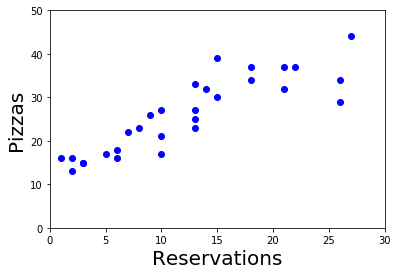

In [5]:
# This directive tells Jupyter to draw matplotlib plots inside the web page
%matplotlib inline

import matplotlib.pyplot as plt

plt.xlabel("Reservations", fontsize=20)     # Print the X label
plt.ylabel("Pizzas", fontsize=20)           # Print the Y label
plt.axis([0, 30, 0, 50])                    # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                        # Plot the data as blue circles (that's what "bo" stands for)
plt.show()                                  # Visualize the diagram

## Making a hypothesis of the model

<img style="float: left;" src="linear_regression_with_one_variable.png" width=50% height=50%>

Let us to approximate the data above with linear regression. That is, with a line.

Our hypothesis would thus be:
h<sub>Θ</sub><sup>(x)</sup> = Θ<sub>0</sub> + Θ<sub>1</sub>x\
or shorthand
h(x) = Θ<sub>0</sub> + Θ<sub>1</sub>x, Θ<sub>0</sub> and Θ<sub>1</sub> being parameters of the function.

Usually line function is wrote as the following\
f(x) = wx + b, or\
y = wx + b\
\
where:
* x = x-coordinate
* y = y-coordinate
* w = weight or scaling factor (adjusts the angle of the line)
* b = bias or shift (tells bias towards the origo i.e. where from the line starts)

Translating above to code we get the predict() function:

In [6]:
def predict(X, w, b):  # Number of reservations as an array, weight, bias
    return X * w + b   # Return prediction of pizzas sold

Let's say that we already found a line that approximates the points, and this line has w = 2.1 and b = 7.3 (for now we give parameters of a line like this, later on we shall use machine learning to produce the parameters of a optimal line i.e. a line with least amount of error). How many pizzas should we expect to sell if we got 10 reservations? Here's the answer:

In [7]:
predict(14, 1.2, 12)

28.8

Note that we can pass an entire NumPy array to predict() instead of a single number. NumPy automatically applies the multiplication and the sum inside predict() to all the elements in the array. This is called broadcasting:

In [8]:
X = np.array([14, 5, 7])
P = predict(X, 1.2, 12)

In [9]:
P

array([28.8, 18. , 20.4])

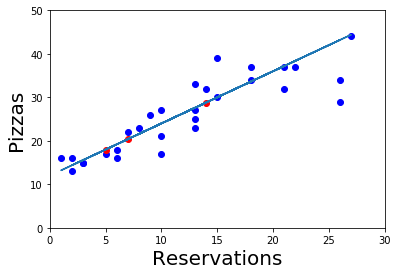

In [10]:
X, Y = np.loadtxt("pizza.txt", skiprows=1,unpack=True)

# This directive tells Jupyter to draw matplotlib plots inside the web page
%matplotlib inline

import matplotlib.pyplot as plt

P = predict(X, 1.2, 12)

X2 = np.array([14, 5, 7]) 
P2 = predict(X2, 1.2, 12)

plt.xlabel("Reservations", fontsize=20)     # Print the X label
plt.ylabel("Pizzas", fontsize=20)           # Print the Y label
plt.axis([0, 30, 0, 50])                    # Both axes range from 0 to 50
plt.plot(X, Y, "bo")                        # Plot the data as blue circles (that's what "bo" stands for)
plt.plot(X2, P2, "ro")                      # Plot the predicted values as red circles
plt.plot(X, P)                              # Plot the given linear function
plt.show()                                  # Visualize the diagram

## Implementing training

Before able to implement training, we need to be able to define how to find parameters of the linear function h<sub>Θ</sub>(x) = Θ<sub>0</sub> + Θ<sub>1</sub>x so that the function fits as well as possible with the training data i.e. so that h<sub>Θ</sub>(x) is as close as possible with a y in the training data.

For this purpose we need to define a loss function, and will use the mean squared error function for this purpose. This is the most commonly used function, which fits well also with the linear regression function:

<img style="float: left;" src="loss_function.png" width=50% height=50%>

Error is squared so that the result is always a positive number. Usually the function is average, not half of the average as here, but it makes no difference.

Let's illustrate this with an example with a simplified hypothesis, where the Θ<sub>0</sub> is always 0, i.e. h<sub>Θ</sub>(x) = Θ<sub>1</sub>x i.e. the simplified loss function is as the following:

<img style="float: left;" src="loss_function2.png" width=50% height=50%>

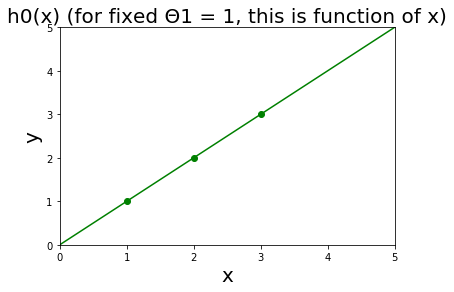

In [11]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook
%matplotlib inline

plt.title("h0(x) (for fixed Θ1 = 1, this is function of x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.axis([0, 5, 0, 5])

plt.plot([0, 1, 2, 3, 4, 5], color = "green")
plt.plot(1, 1 * 1, "go") # y = 1 * x
plt.plot(2, 1 * 2, "go") # y = 1 * x
plt.plot(3, 1 * 3, "go") # y = 1 * x
plt.show()

Green dots above represent the real values while the green line represent the perfect (loss = 0) function (prediction) to match with the real data:

<img style="float: left;" src="loss_function3.png" width=50% height=50%>

Would the Θ<sub>1</sub> be 0.5:

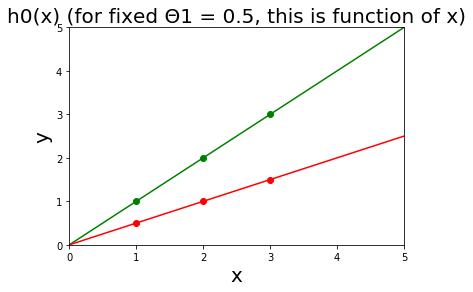

In [12]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook
%matplotlib inline

plt.title("h0(x) (for fixed Θ1 = 0.5, this is function of x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.axis([0, 5, 0, 5])

plt.plot([0, 1, 2, 3, 4, 5], color = "green")
plt.plot([0, 0.5, 1, 1.5, 2, 2.5], color = "red")
plt.plot(1, 1 * 1, "go") # y = 1 * x
plt.plot(2, 1 * 2, "go") # y = 1 * x
plt.plot(3, 1 * 3, "go") # y = 1 * x
plt.plot(1, 0.5 * 1, "ro") # y = 0.5 * x
plt.plot(2, 0.5 * 2, "ro") # y = 0.5 * x
plt.plot(3, 0.5 * 3, "ro") # y = 0.5 * x
plt.show()

Green dots above represent the real values and the green line represent the perfect (loss = 0) function (prediction). Red dots above represent the prediction based on the function represented by a red line. Loss is distance between red dot and green dot, or as a mean squared error:

<img style="float: left;" src="loss_function4.png" width=75% height=75%>

Turning this to code results to a function that takes the datasets (X and Y) and a line (defined by w and b):

In [13]:
# The used loss function here is a "mean squared error"
def loss(X, Y, w, b): # Y contains real values of the pizza sold
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2) / 2 # ** is power operation in Python i.e. this is squared -> returns only positive numbers
              # mean               # squared   # half

Let's try it out with the data from pizza.txt and two made-up values for the line's parameters:

In [14]:
X, Y = np.loadtxt("pizza.txt", skiprows = 1, unpack = True)

In [15]:
loss(X, Y, 1.2, 12)

11.889333333333338

Next we need to define a function that tries to minimize the loss or error of the linear function by finding the parameters that result to least loss by using the loss function defined above i.e. minimize parameters of the function.

The function below takes a dataset (X and Y) and it returns a line that approximates it. It also takes a number of iterations and a learning rate (lr):

In [16]:
# Simple training algorithm, that does not e.g. try to change w and b at the same time
def simple_train(X, Y, iterations, lr): # lr = learning rate
    w = b = 0 # Start with some line
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
                
        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b, current_loss

    raise Exception("Couldn't find a result within %d iterations" % iterations)

We have everything we need to find a line that approximates our pizza.txt dataset:

In [17]:
w1, b1, loss1 = simple_train(X, Y, 10000, 0.01)

Iteration    0 => Loss: 406.433333
Iteration    1 => Loss: 402.410273
Iteration    2 => Loss: 398.409093
Iteration    3 => Loss: 394.429793
Iteration    4 => Loss: 390.472373
Iteration    5 => Loss: 386.536833
Iteration    6 => Loss: 382.623173
Iteration    7 => Loss: 378.731393
Iteration    8 => Loss: 374.861493
Iteration    9 => Loss: 371.013473
Iteration   10 => Loss: 367.187333
Iteration   11 => Loss: 363.383073
Iteration   12 => Loss: 359.600693
Iteration   13 => Loss: 355.840193
Iteration   14 => Loss: 352.101573
Iteration   15 => Loss: 348.384833
Iteration   16 => Loss: 344.689973
Iteration   17 => Loss: 341.016993
Iteration   18 => Loss: 337.365893
Iteration   19 => Loss: 333.736673
Iteration   20 => Loss: 330.129333
Iteration   21 => Loss: 326.543873
Iteration   22 => Loss: 322.980293
Iteration   23 => Loss: 319.438593
Iteration   24 => Loss: 315.918773
Iteration   25 => Loss: 312.420833
Iteration   26 => Loss: 308.944773
Iteration   27 => Loss: 305.490593
Iteration   28 => Lo

Iteration 1372 => Loss: 11.925990
Iteration 1373 => Loss: 11.920407
Iteration 1374 => Loss: 11.914923
Iteration 1375 => Loss: 11.909540
Iteration 1376 => Loss: 11.904257
Iteration 1377 => Loss: 11.899073
Iteration 1378 => Loss: 11.893990
Iteration 1379 => Loss: 11.889007
Iteration 1380 => Loss: 11.884123
Iteration 1381 => Loss: 11.879340
Iteration 1382 => Loss: 11.874657
Iteration 1383 => Loss: 11.870073
Iteration 1384 => Loss: 11.865590
Iteration 1385 => Loss: 11.861207
Iteration 1386 => Loss: 11.856923
Iteration 1387 => Loss: 11.852740
Iteration 1388 => Loss: 11.852493
Iteration 1389 => Loss: 11.847143
Iteration 1390 => Loss: 11.841893
Iteration 1391 => Loss: 11.836743
Iteration 1392 => Loss: 11.831693
Iteration 1393 => Loss: 11.826743
Iteration 1394 => Loss: 11.821893
Iteration 1395 => Loss: 11.817143
Iteration 1396 => Loss: 11.812493
Iteration 1397 => Loss: 11.807943
Iteration 1398 => Loss: 11.803493
Iteration 1399 => Loss: 11.799143
Iteration 1400 => Loss: 11.794893
Iteration 1401

In [18]:
print("Trained with a simple loss function: loss = %.6f w = %.6f b = %.6f" % (loss1, w1, b1))

Trained with a simple loss function: loss = 11.431783 w = 1.100000 b = 12.930000


Here is the line visualized over the examples:

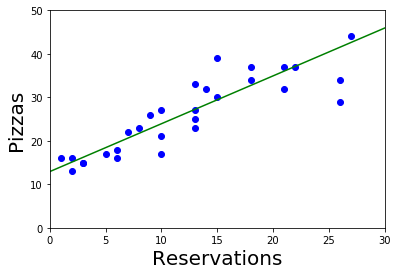

In [19]:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 30, 0, 50])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b1, predict(50, w1, b1)], color="g")

# Visualize the diagram:
plt.show()

Simple training function above works, but has it's limitations. By changing w and b separately we can't be sure we find the most optimal line fitting with the data i.e. having the least amount of loss.

The training function above could be improved to take all the possible combination of w and b into account, but if we would have more parameters to the function it would get way too complex and slow in no time.

Before implementing a new training algorithm, let's visualize the loss to see how the output of the loss-function changes when its inputs change and plot J(-1..5) and using only the parameter w for simplicity, i.e. parameter b will be set to 0: 

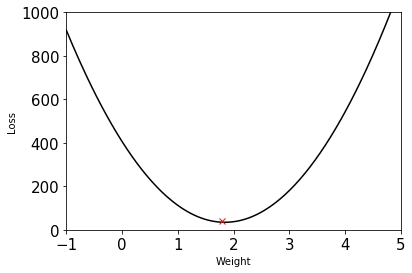

In [88]:
import matplotlib.pyplot as plt

# Draw matplotlib plots inside this notebook
%matplotlib inline

# Compute losses for w ranging from -1 to 5
weights = np.linspace(-1.0, 5.0, 200)
losses = [loss(X, Y, w1, 0) for w1 in weights] # b is set to constant value of 0 here to simplify the plot

# Plot weights and losses
plt.axis([-1, 5, 0, 1000])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.plot(weights, losses, color = "black")
plt.plot(1.8, 40, "rx") # Approximate of the point we wan't to find by using gradient descent
plt.show()

The idea of our algorithm is to start from a random point at the loss curve. Algorithm will check gradient in the given point. If the gradient shows "uphills", we need to reverse the gradient (and usually multiply it with a small number i.e. learning rate to take smaller steps downwards) and take a step "downhills". This is repeated until we hit the minimum, where the gradient is "flat". Overshooting the minimum does not matter as the algorithm is a self correcting in this sense.

<img style="float: left;" src="gradient_descent.png" width=50% height=50%>

The gradient descent algorithm works well for this kind of a loss curve, but would not work right e.g. in case the loss curve would have local minimums in addition to global minimum.

Let us to move on and see how loss curve would look like when we take both parameters w and b into account. To be able to visualize the mean squared error in this case we need a 3D chart representing a 3D surface, like below. Instead of showing loss as 3D surface, it is usually presented in form of countour images (plots).

<img style="float: left;" src="3d_loss.png" width=50% height=50%>

Other than having one additional parameter and one additional dimension, gradient descent works just like previously in the single parameter example. Gradient on the surface is actually combination of gradients of b and w. Height in 3D charts indicates the value of our loss function J(Θ<sub>0</sub>, Θ<sub>1</sub>), i.e. larger the hight, larger the loss. The gradient descent algorithm is defined below:

<img style="float: left;" src="gradient_descent_algorithm.png" width=25% height=25%>

In above,\
:= means assignment\
α is learning rate, i.e. defines how big of steps algorithm will take downhills\
∂ is used to denote partial derivative

Let us move forward towards the implementation. The loss function J(Θ<sub>0</sub>, Θ<sub>1</sub>) would be as the following (mean squared error that we studied earlier):

<img style="float: left;" src="loss_function5.png" width=25% height=25%>

To calculate gradient of the loss above, we will use partial derivates of L respective to w and L respective to b.

<img style="float: left;" src="derivative.png" width=50% height=50%>

Function below calculates the gradient in the given point at the loss curve and implements the derivates above.

In [24]:
def gradient(X, Y, w, b):
    w_gradient = np.average(2 * X * (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

In [25]:
gradient(X, Y, 2, 3)

(144.4, 2.933333333333333)

In [ ]:
Function below defines gradient descent algorithm, which is much better and widely used in machine learning:

In [40]:
# Gradient descent based training algorithm
def gradient_descent_train(X, Y, iterations, lr): # lr = learning rate
    w = b = 0 # Start with some line
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        w_gradient, b_gradient = gradient(X, Y, w, b)  # Calculate gradient
        w -= w_gradient * lr  # Invert the gradient, scale (multiply it with learning rate) and assign the value
        b -= b_gradient * lr  # Invert the gradient, scale (multiply it with learning rate) and assign the value
    return(w, b, current_loss)



We have everything we need to find a line that approximates our pizza.txt dataset:

In [41]:
w2, b2, loss2 = gradient_descent_train(X, Y, 10000, 0.001)

Iteration    0 => Loss: 406.433333
Iteration    1 => Loss: 151.288478
Iteration    2 => Loss: 70.992045
Iteration    3 => Loss: 45.710688
Iteration    4 => Loss: 37.739529
Iteration    5 => Loss: 35.214942
Iteration    6 => Loss: 34.404105
Iteration    7 => Loss: 34.132508
Iteration    8 => Loss: 34.030597
Iteration    9 => Loss: 33.982094
Iteration   10 => Loss: 33.950413
Iteration   11 => Loss: 33.924042
Iteration   12 => Loss: 33.899360
Iteration   13 => Loss: 33.875227
Iteration   14 => Loss: 33.851283
Iteration   15 => Loss: 33.827417
Iteration   16 => Loss: 33.803593
Iteration   17 => Loss: 33.779798
Iteration   18 => Loss: 33.756031
Iteration   19 => Loss: 33.732290
Iteration   20 => Loss: 33.708574
Iteration   21 => Loss: 33.684883
Iteration   22 => Loss: 33.661217
Iteration   23 => Loss: 33.637577
Iteration   24 => Loss: 33.613961
Iteration   25 => Loss: 33.590371
Iteration   26 => Loss: 33.566806
Iteration   27 => Loss: 33.543266
Iteration   28 => Loss: 33.519750
Iteration   

Iteration 1382 => Loss: 16.656886
Iteration 1383 => Loss: 16.651320
Iteration 1384 => Loss: 16.645761
Iteration 1385 => Loss: 16.640208
Iteration 1386 => Loss: 16.634660
Iteration 1387 => Loss: 16.629119
Iteration 1388 => Loss: 16.623583
Iteration 1389 => Loss: 16.618053
Iteration 1390 => Loss: 16.612529
Iteration 1391 => Loss: 16.607011
Iteration 1392 => Loss: 16.601499
Iteration 1393 => Loss: 16.595992
Iteration 1394 => Loss: 16.590492
Iteration 1395 => Loss: 16.584997
Iteration 1396 => Loss: 16.579508
Iteration 1397 => Loss: 16.574025
Iteration 1398 => Loss: 16.568548
Iteration 1399 => Loss: 16.563077
Iteration 1400 => Loss: 16.557611
Iteration 1401 => Loss: 16.552152
Iteration 1402 => Loss: 16.546698
Iteration 1403 => Loss: 16.541250
Iteration 1404 => Loss: 16.535807
Iteration 1405 => Loss: 16.530371
Iteration 1406 => Loss: 16.524940
Iteration 1407 => Loss: 16.519515
Iteration 1408 => Loss: 16.514096
Iteration 1409 => Loss: 16.508682
Iteration 1410 => Loss: 16.503275
Iteration 1411

Iteration 2355 => Loss: 13.281481
Iteration 2356 => Loss: 13.279504
Iteration 2357 => Loss: 13.277529
Iteration 2358 => Loss: 13.275556
Iteration 2359 => Loss: 13.273585
Iteration 2360 => Loss: 13.271616
Iteration 2361 => Loss: 13.269649
Iteration 2362 => Loss: 13.267685
Iteration 2363 => Loss: 13.265722
Iteration 2364 => Loss: 13.263761
Iteration 2365 => Loss: 13.261803
Iteration 2366 => Loss: 13.259847
Iteration 2367 => Loss: 13.257892
Iteration 2368 => Loss: 13.255940
Iteration 2369 => Loss: 13.253990
Iteration 2370 => Loss: 13.252042
Iteration 2371 => Loss: 13.250096
Iteration 2372 => Loss: 13.248152
Iteration 2373 => Loss: 13.246210
Iteration 2374 => Loss: 13.244271
Iteration 2375 => Loss: 13.242333
Iteration 2376 => Loss: 13.240397
Iteration 2377 => Loss: 13.238464
Iteration 2378 => Loss: 13.236532
Iteration 2379 => Loss: 13.234603
Iteration 2380 => Loss: 13.232675
Iteration 2381 => Loss: 13.230750
Iteration 2382 => Loss: 13.228827
Iteration 2383 => Loss: 13.226905
Iteration 2384

Iteration 3514 => Loss: 11.963628
Iteration 3515 => Loss: 11.963052
Iteration 3516 => Loss: 11.962476
Iteration 3517 => Loss: 11.961901
Iteration 3518 => Loss: 11.961326
Iteration 3519 => Loss: 11.960752
Iteration 3520 => Loss: 11.960179
Iteration 3521 => Loss: 11.959606
Iteration 3522 => Loss: 11.959034
Iteration 3523 => Loss: 11.958462
Iteration 3524 => Loss: 11.957891
Iteration 3525 => Loss: 11.957321
Iteration 3526 => Loss: 11.956751
Iteration 3527 => Loss: 11.956182
Iteration 3528 => Loss: 11.955614
Iteration 3529 => Loss: 11.955046
Iteration 3530 => Loss: 11.954479
Iteration 3531 => Loss: 11.953912
Iteration 3532 => Loss: 11.953346
Iteration 3533 => Loss: 11.952780
Iteration 3534 => Loss: 11.952215
Iteration 3535 => Loss: 11.951651
Iteration 3536 => Loss: 11.951087
Iteration 3537 => Loss: 11.950524
Iteration 3538 => Loss: 11.949962
Iteration 3539 => Loss: 11.949400
Iteration 3540 => Loss: 11.948839
Iteration 3541 => Loss: 11.948278
Iteration 3542 => Loss: 11.947718
Iteration 3543

Iteration 4642 => Loss: 11.584746
Iteration 4643 => Loss: 11.584573
Iteration 4644 => Loss: 11.584399
Iteration 4645 => Loss: 11.584226
Iteration 4646 => Loss: 11.584053
Iteration 4647 => Loss: 11.583880
Iteration 4648 => Loss: 11.583707
Iteration 4649 => Loss: 11.583535
Iteration 4650 => Loss: 11.583362
Iteration 4651 => Loss: 11.583190
Iteration 4652 => Loss: 11.583018
Iteration 4653 => Loss: 11.582846
Iteration 4654 => Loss: 11.582675
Iteration 4655 => Loss: 11.582503
Iteration 4656 => Loss: 11.582332
Iteration 4657 => Loss: 11.582161
Iteration 4658 => Loss: 11.581990
Iteration 4659 => Loss: 11.581819
Iteration 4660 => Loss: 11.581649
Iteration 4661 => Loss: 11.581478
Iteration 4662 => Loss: 11.581308
Iteration 4663 => Loss: 11.581138
Iteration 4664 => Loss: 11.580968
Iteration 4665 => Loss: 11.580798
Iteration 4666 => Loss: 11.580629
Iteration 4667 => Loss: 11.580460
Iteration 4668 => Loss: 11.580291
Iteration 4669 => Loss: 11.580122
Iteration 4670 => Loss: 11.579953
Iteration 4671

Iteration 5822 => Loss: 11.467944
Iteration 5823 => Loss: 11.467895
Iteration 5824 => Loss: 11.467845
Iteration 5825 => Loss: 11.467796
Iteration 5826 => Loss: 11.467747
Iteration 5827 => Loss: 11.467697
Iteration 5828 => Loss: 11.467648
Iteration 5829 => Loss: 11.467599
Iteration 5830 => Loss: 11.467550
Iteration 5831 => Loss: 11.467501
Iteration 5832 => Loss: 11.467452
Iteration 5833 => Loss: 11.467403
Iteration 5834 => Loss: 11.467354
Iteration 5835 => Loss: 11.467305
Iteration 5836 => Loss: 11.467256
Iteration 5837 => Loss: 11.467207
Iteration 5838 => Loss: 11.467158
Iteration 5839 => Loss: 11.467110
Iteration 5840 => Loss: 11.467061
Iteration 5841 => Loss: 11.467013
Iteration 5842 => Loss: 11.466964
Iteration 5843 => Loss: 11.466916
Iteration 5844 => Loss: 11.466867
Iteration 5845 => Loss: 11.466819
Iteration 5846 => Loss: 11.466771
Iteration 5847 => Loss: 11.466722
Iteration 5848 => Loss: 11.466674
Iteration 5849 => Loss: 11.466626
Iteration 5850 => Loss: 11.466578
Iteration 5851

Iteration 6975 => Loss: 11.435033
Iteration 6976 => Loss: 11.435019
Iteration 6977 => Loss: 11.435004
Iteration 6978 => Loss: 11.434990
Iteration 6979 => Loss: 11.434975
Iteration 6980 => Loss: 11.434961
Iteration 6981 => Loss: 11.434946
Iteration 6982 => Loss: 11.434932
Iteration 6983 => Loss: 11.434917
Iteration 6984 => Loss: 11.434903
Iteration 6985 => Loss: 11.434889
Iteration 6986 => Loss: 11.434874
Iteration 6987 => Loss: 11.434860
Iteration 6988 => Loss: 11.434845
Iteration 6989 => Loss: 11.434831
Iteration 6990 => Loss: 11.434817
Iteration 6991 => Loss: 11.434803
Iteration 6992 => Loss: 11.434788
Iteration 6993 => Loss: 11.434774
Iteration 6994 => Loss: 11.434760
Iteration 6995 => Loss: 11.434746
Iteration 6996 => Loss: 11.434731
Iteration 6997 => Loss: 11.434717
Iteration 6998 => Loss: 11.434703
Iteration 6999 => Loss: 11.434689
Iteration 7000 => Loss: 11.434675
Iteration 7001 => Loss: 11.434660
Iteration 7002 => Loss: 11.434646
Iteration 7003 => Loss: 11.434632
Iteration 7004

Iteration 8137 => Loss: 11.425339
Iteration 8138 => Loss: 11.425335
Iteration 8139 => Loss: 11.425331
Iteration 8140 => Loss: 11.425327
Iteration 8141 => Loss: 11.425322
Iteration 8142 => Loss: 11.425318
Iteration 8143 => Loss: 11.425314
Iteration 8144 => Loss: 11.425310
Iteration 8145 => Loss: 11.425306
Iteration 8146 => Loss: 11.425301
Iteration 8147 => Loss: 11.425297
Iteration 8148 => Loss: 11.425293
Iteration 8149 => Loss: 11.425289
Iteration 8150 => Loss: 11.425285
Iteration 8151 => Loss: 11.425281
Iteration 8152 => Loss: 11.425276
Iteration 8153 => Loss: 11.425272
Iteration 8154 => Loss: 11.425268
Iteration 8155 => Loss: 11.425264
Iteration 8156 => Loss: 11.425260
Iteration 8157 => Loss: 11.425256
Iteration 8158 => Loss: 11.425252
Iteration 8159 => Loss: 11.425247
Iteration 8160 => Loss: 11.425243
Iteration 8161 => Loss: 11.425239
Iteration 8162 => Loss: 11.425235
Iteration 8163 => Loss: 11.425231
Iteration 8164 => Loss: 11.425227
Iteration 8165 => Loss: 11.425223
Iteration 8166

Iteration 9140 => Loss: 11.422735
Iteration 9141 => Loss: 11.422733
Iteration 9142 => Loss: 11.422732
Iteration 9143 => Loss: 11.422731
Iteration 9144 => Loss: 11.422729
Iteration 9145 => Loss: 11.422728
Iteration 9146 => Loss: 11.422726
Iteration 9147 => Loss: 11.422725
Iteration 9148 => Loss: 11.422723
Iteration 9149 => Loss: 11.422722
Iteration 9150 => Loss: 11.422720
Iteration 9151 => Loss: 11.422719
Iteration 9152 => Loss: 11.422718
Iteration 9153 => Loss: 11.422716
Iteration 9154 => Loss: 11.422715
Iteration 9155 => Loss: 11.422713
Iteration 9156 => Loss: 11.422712
Iteration 9157 => Loss: 11.422710
Iteration 9158 => Loss: 11.422709
Iteration 9159 => Loss: 11.422708
Iteration 9160 => Loss: 11.422706
Iteration 9161 => Loss: 11.422705
Iteration 9162 => Loss: 11.422703
Iteration 9163 => Loss: 11.422702
Iteration 9164 => Loss: 11.422700
Iteration 9165 => Loss: 11.422699
Iteration 9166 => Loss: 11.422698
Iteration 9167 => Loss: 11.422696
Iteration 9168 => Loss: 11.422695
Iteration 9169

In [45]:
print("Trained with a gradient descent function    : loss = %.6f w = %.6f b = %.6f" % (loss2, w2, b2))
print("Trained with a simple training function was : loss = %.6f w = %.6f b = %.6f" % (loss1, w1, b1))

Trained with a gradient descent function    : loss = 11.421916 w = 1.084826 b = 13.108507
Trained with a simple training function was : loss = 11.431783 w = 1.100000 b = 12.930000


Here is the line visualized over the examples:

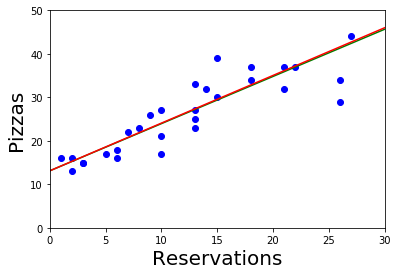

In [50]:
# Plot the examples like we did before:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 30, 0, 50])
plt.plot(X, Y, "bo")

# Plot the line:
plt.plot([0, 50], [b, predict(50, w2, b2)], color="g")
plt.plot([0, 50], [b, predict(50, w1, b1)], color="r")

# Visualize the diagram:
plt.show()

Finally, let's use this model to predict how many pizzas we're going to sell if we got 42 reservations:

In [48]:
reservations = 42
predict(reservations, w, b)

58.67119296294469

So we should prepare enough dough for about 60 pizzas. We just built a system that learns!